# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 

Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. 

Уделить внимание фильмам, которые получили государственную поддержку.

Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.

Мы будете работать с данными, опубликованными на портале открытых данных Министерства культуры.

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

**План работы:**

    1. Проверить достаточно ли данных для анализа, объединить данные в одну таблицу
    2. Предобработка
       -проверить на пропуски, заполнить где это возможно
       -проверить типы данных, изменить где необходимо
       -проверить на дубли (вероятнее всего в названии фильма)
       -добавить столбцы (год выхода, режиссер, жанр)
    3. Изучить каждый важный параметр, найти и удалить аномалии
    4. Проанализировать какую долю от общего бюджета фильма составляет государственная поддержка
    5. Посмотреть, сколько фильмов выходило в прокат каждый год, изучить динамику
    6. Проанализировать как влияет возрастное ограничение аудитории
    7. Проанализировать фильмы с гос.поддержкой, окупаемость, популярность
    6. Выводы и рекомендации


## ОБЩАЯ ИНФОРМАЦИЯ 

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
mkrf_movies = pd.read_csv('файл')

In [5]:
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [6]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
#зафиксируем форму первичных данных
mkrf_movies.shape

(7486, 15)

In [8]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [9]:
#чтобы сделать вывод чисел удобным для нас мы можем "подавить" перевод числа в эскпоненциальную нотацию
pd.set_option('display.float_format', lambda x: '%.3f' % x)

np.set_printoptions(suppress=True)

In [11]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [12]:
#зафиксируем форму первичных данных
mkrf_shows.shape

(3158, 2)

In [13]:
#изменим тип данных в puNumber для объединения таблиц по этому значению
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')

In [14]:
#объединим данные в одну таблицу по puNumber в новую переменную
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='outer')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [16]:
#проверим вошли ли все строки после объединения
data.shape

(7486, 16)

Видим, что при объединении данных ничего не потерялось, все 3158 строк box_office на месте.

array([[<AxesSubplot:title={'center':'refundable_support'}>,
        <AxesSubplot:title={'center':'nonrefundable_support'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'box_office'}>]], dtype=object)

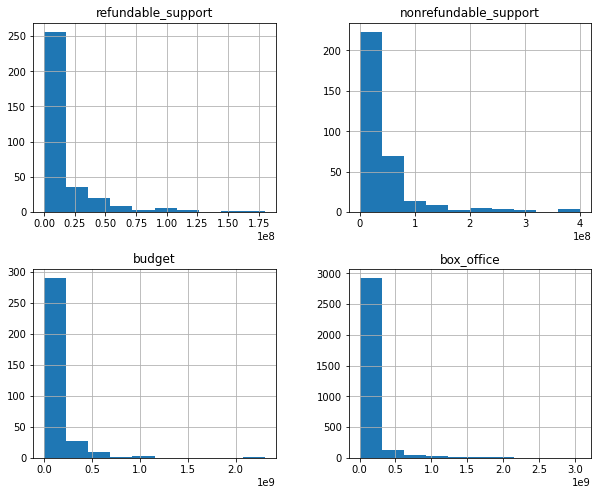

In [17]:
#построим гистаграммы для числовых данных
data.hist(
    column=[
        'refundable_support',
        'nonrefundable_support',
        'budget',
        'box_office'
    ], 
    figsize=(10, 8)
)

### Промежуточный вывод 

В нашем распоряжении 7486 строк данных о рос.кинопрокате. 
Этих данных достаточно для анализа. 
Видим что имеются пропуски по некоторым видам данных, выбросы и некорректные типы данных.

<div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

 Правильно, что проверяешь таблицы до и после объединения. Видим, что количество строк соответсвует длине первой таблицы, значит ничего не утеряно.
    
</div>

## ПРЕДОБРАБОТКА ДАННЫХ

### Преобразование типов данных

In [18]:
#преобразуем в дату
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
#посмотрим какие значения указаны в рейтинге
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видим рейтинг в %, заменим его на 10тибальную систему

In [20]:
idx = data[(data['ratings'].str.contains('%')) & (data['ratings'].notna())].index
data['ratings'] = data['ratings'].str.replace(pat='%', repl='')
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data.loc[idx, 'ratings'] = data.loc[idx, 'ratings'] / 10

In [21]:
#проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

### Пропуски

Определим в каких столбцах есть пропуски и сколько их:

In [22]:
data.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Обнаружены пропуски:

    puNumber номер прокатного удостоверения - заполнить невозможно, пропуск в 1 строке, оставляем, т.к отсутствие этих данных не помешает корректному анализу
    film_studio  студия-производитель - заполнить невозможно, оставляем, т.к отсутствие этих данных не помешает корректному анализу
    production_country production_country - заполнить невозможно, оставляем, т.к отсутствие этих данных не помешает корректному анализу
    director режиссёр - заполнить невозможно, заменим на unknown
    producer продюсер - заполнить невозможно, оставляем, т.к отсутствие этих данных не помешает корректному анализу
    refundable_support объём возвратных средств государственной поддержки - строк связанных с поддержкой с пропусками одинаковое количество, значит не ошибка, это фильмы, где поддержка отсутствует, оставляем
    nonrefundable_support объём невозвратных средств государственной поддержки - оставляем
    budget общий бюджет фильма - оставляем
    financing_source - источник государственного финансирования - оставляем
    ratings рейтинг фильма на КиноПоиске - заполнить невозможно, оставляем
    genres жанр фильма - заполнить невозможно, заменим на unknown
    box_office  сборы в рублях - заполнить невозможно, оставляем

In [23]:
data['director'] = data['director'].fillna('unknown')

In [24]:
data['genres'] = data['genres'].fillna('unknown')

In [25]:
data.query('box_office == 0').count()

title                    24
puNumber                 24
show_start_date          24
type                     24
film_studio              24
production_country       24
director                 24
producer                 20
age_restriction          24
refundable_support        0
nonrefundable_support     0
budget                    0
financing_source          0
ratings                  20
genres                   24
box_office               24
dtype: int64

### Поиск дубликатов

Изучим уникальные значения в столбце с названиями фильмов

In [26]:
data['title'].value_counts()

День святого Валентина_                5
Прощание                               4
Дитя тьмы                              4
Жена путешественника во времени        4
Дорога /По новелле Кормака МкКарфи/    4
                                      ..
Мужская женская игра                   1
Переводчик.                            1
Хрустальное небо вчерашнего дня        1
Испытательный срок (2016)              1
Пипец 2 /По комиксам Марка Миллара/    1
Name: title, Length: 6772, dtype: int64

In [27]:
data['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [28]:
#посмотрим поближе на несколько фильмов с повторяющимися названиями
data.query('title == "День святого Валентина_"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810.000,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010.000,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210.000,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210.000,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410.000,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.700,"мелодрама,комедия",NaN


In [29]:
data.query('title == "Двойной копец"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4791,Двойной копец,121010010.000,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Марк Платт Продакшнз",США,Кевин Смит,"Полли Джонсен, Марк Платт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.000,"боевик,триллер,комедия",NaN
4837,Двойной копец,221017011.000,2011-01-27 12:00:00+00:00,Художественный,"Уорнер Бразерс, Марк Платт Продакшнз",США,Кевин Смит,"Полли Джонсен, Марк Платт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.000,"боевик,триллер,комедия",NaN
4845,Двойной копец,221015611.000,2011-01-26 12:00:00+00:00,Художественный,"Уорнер Бразерс, Марк Платт Продакшнз",США,Кевин Смит,"Полли Джонсен, Марк Платт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.000,"боевик,триллер,комедия",NaN
5322,Двойной копец,221081110.000,2010-08-10 12:00:00+00:00,Художественный,"Уорнер Бразерс, Марк Платт Продакшнз",США,Кевин Смит,"Полли Джонсен, Марк Платт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.000,"боевик,триллер,комедия",NaN


Видим, что строки отличаются по номеру прокатного удостоверения и дате премьеры. Скорее всего по какой-то причине была необходимость получить несколько прокатных удостоверений из-за изменения даты премьеры или разных подтверждающих документов на фильм.

Если нет данных о бюджете, господдержке и сборах, в этом случае дубли не несут нам новой информации и смысла оставлять их нет. Если же есть информация хоть в одном из полей со сборами, господдержкой или бюджетом, это не считается дублем.

In [30]:
#удалим дубликаты с пропусками господдержке и бюджете и сборах
data = data.drop_duplicates(subset=['title',
                        'refundable_support',
                        'nonrefundable_support',
                        'budget',
                        'box_office'], keep='first')

In [31]:
#находим дубликаты, где кроме пропусков есть значения в господдержке и бюджете и сборах
temp = data[data.duplicated(subset=['title'], keep=False)]

In [32]:
#в найденных дубликатах найдем строки с пропусками в господдержке и бюджете и сборах
idx = temp[(temp['refundable_support'].isna()) &
     (temp['nonrefundable_support'].isna()) &
     (temp['budget'].isna()) &
     (temp['box_office'].isna())].index

In [33]:
#удалим их
data = data.drop(idx)

In [34]:
#проверим результат
data['title'].value_counts()

Арктика 3D                             2
Лимб                                   2
Побег из Вегаса                        2
Пингвиненок Пороро: Большие гонки      2
Гадкий Я                               2
                                      ..
Мышата и Луна                          1
Молчи в тряпочку                       1
Роботы 3D                              1
Срочно выйду замуж                     1
Пипец 2 /По комиксам Марка Миллара/    1
Name: title, Length: 6772, dtype: int64

In [35]:
data.query('title == "Она"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1415,Она,121003414.000,2014-02-20 12:00:00+00:00,Художественный,Аннапурна Пикчерз,США,Спайк Джонс,"Меган Эллисон, Спайк Джонс, Винсент Ландэйл",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"мелодрама,фантастика,драма",13420.000
5553,Она,131000417.000,2017-11-30 12:00:00+00:00,Художественный,"Астана Филм Фонд, Астана Банки, Сатаифилм, Каз...",Казахстан,Акан Сатаев,"Эрнар Курмашев, Алия Мендыгожина, Акан Сатаев",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"мелодрама,фантастика,драма",2152951.000


In [36]:
data.query('title == "Союз зверей /По книге Эрика Кастнера/"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4115,Союз зверей /По книге Эрика Кастнера/,124001610.000,2010-10-22 12:00:00+00:00,Анимационный,"Эмбиент ИНтертейнмент, Константин Филм, Уайт Х...",Германия,"Рейнхард Клоос, Хольгер Таппе","Рейнхард Клоос, Мартин Московиц, Хольгер Таппе...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.600,"мультфильм,комедия,приключения",25170.000
4125,Союз зверей /По книге Эрика Кастнера/,224022410.000,2010-11-18 12:00:00+00:00,Анимационный,"Эмбиент ИНтертейнмент, Константин Филм, Уайт Х...",Германия,"Рейнхард Клоос, Хольгер Таппе","Рейнхард Клоос, Мартин Московиц, Хольгер Таппе...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.600,"мультфильм,комедия,приключения",400.000


Видим, что остались задвоенными только те фильмы, которые имеют данные о сборах фильма на разные прокатные удостоверения.

Проверим уникальные значения в прокатных удостоверениях.

In [37]:
data['puNumber'].value_counts()

211003119.000    1
121008515.000    1
111001619.000    1
121002514.000    1
212010410.000    1
                ..
121001019.000    1
221059710.000    1
121008815.000    1
124001812.000    1
221164010.000    1
Name: puNumber, Length: 6801, dtype: int64

Видим, что дублей нет.

In [38]:
data.duplicated().sum()

0

Полных дублей тоже нет.

### Изучение категориальных значения

Посмотрим на столбцы с категориальными значениями.

#### Тип фильма

In [39]:
#посмотрим на уникальные значения типа фильма
data['type'].value_counts()

Художественный                3936
 Художественный               1359
Анимационный                   778
Прочие                         392
Документальный                 283
Научно-популярный               52
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

Видим пробелы в начале слов Художественный и Анимационный. Удалим пробелы.

In [40]:
data['type'] = data['type'].str.strip()

In [41]:
#проверим
data['type'].value_counts()

Художественный                5295
Анимационный                   779
Прочие                         392
Документальный                 283
Научно-популярный               52
Музыкально-развлекательный       1
Name: type, dtype: int64

#### Студия-производитель

In [42]:
data['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                                                                                                                      337
ООО "Мульт в кино"                                                                                                                                                                                          57
Анимаккорд Лтд                                                                                                                                                                                              23
ООО "Мульт в кино"                                                                                                                                                                                          18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                                                                      

Видим, что есть повторяющиеся значения и студии списков. Нужно учесть в дальнейшем.

#### Страна-производитель 

In [43]:
data['production_country'].value_counts()

Россия                                 1796
США                                    1789
СССР                                    343
Франция                                 278
Великобритания                          241
                                       ... 
Израиль-США-Франция                       1
Швеция-Франция-Дания                      1
Франция - Португалия                      1
Германия - Великобритания - Австрия       1
Франция - Бельгия - Испания               1
Name: production_country, Length: 942, dtype: int64

Видим что есть списки стран. Нужно это учесть.

#### Режиссер 

In [44]:
data['director'].value_counts()

О.Семёнова          47
Д.Червяцов          16
Вуди Аллен          13
О.Семёнова          12
Стивен Содерберг    12
                    ..
А.Осипова            1
Шэрон Магуайр        1
Джеймс Франко        1
Хоми Аджаниа         1
Джереми Деллер       1
Name: director, Length: 4792, dtype: int64

Видим, что имена режиссеров заполняются по-разному: с полным именем и без, один режиссер и группа режиссеров. Нужно учесть это в дальнейшем, выделив основного режиссера.

#### Продюссер

In [45]:
data['producer'].value_counts()

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            16
Тони Майерс                                      11
                                                 ..
Яна Бол, Жан Гуссен, Эмели Кристианс              1
Дэвид Джозеф Крэйг                                1
Пол Карри, Джоди Маттерсон, Стивен Хутенски       1
Джефф Бродстрит, Элайджа Дреннер, Инго Юхт        1
Макул Вигерт                                      1
Name: producer, Length: 5313, dtype: int64

Видим, что имена режиссеров заполняются по-разному: с полным именем и без, один режиссер и группа режиссеров. Нужно учесть это в дальнейшем

#### Возрастная категория 

In [46]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2519
«12+» - для детей старше 12 лет           1483
«18+» - запрещено для детей               1435
«0+» - для любой зрительской аудитории     759
«6+» - для детей старше 6 лет              606
Name: age_restriction, dtype: int64

Без аномалий.

#### Источник государственного финансирования 

In [47]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

Без аномалий.

#### Жанр фильма 

In [48]:
data['genres'].value_counts()

unknown                         967
драма                           448
комедия                         330
мелодрама,комедия               181
драма,мелодрама                 170
                               ... 
криминал,боевик                   1
мелодрама,драма,боевик            1
приключения,фантастика,драма      1
комедия,детектив,приключения      1
драма,мультфильм                  1
Name: genres, Length: 743, dtype: int64

In [49]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

Большинству фильмов на Кинопоиске присвоено несколько жанров. Нужно это учесть и выделить основной жанр.

<div class="alert alert-block alert-info">
    
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Добавила все остальные.
    
</div>

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Супер, этот блок стал ещё лучше!
</div>

### Изучение количественных значений

#### Бюджет фильмов

Посмотрим поближе на бюджет фильмов и его соотношение с объёмом возвратных и невозвратных средств государственной поддержки

In [50]:
#отберем данные с гос.поддержкой 
data.query('refundable_support>0 or nonrefundable_support>0').pivot_table(
    index='budget', 
    values=['refundable_support', 'nonrefundable_support']
)

,nonrefundable_support,refundable_support
budget,,
0.000,65174674.412,16705882.353
14462464.000,4700000.000,0.000
15010000.000,10000000.000,0.000
18166418.000,8000000.000,0.000
18706080.000,11520000.000,0.000
...,...,...
779941965.000,60000000.000,0.000
944000000.000,400000000.000,100000000.000
980000000.000,400000000.000,100000000.000


Видим, что есть нулевой бюджет фильма при данных о гос.поддержке, посмотрим на эти фильмы

In [51]:
#создадим столбец с общей суммой поддержки
data['sum_support'] = data['nonrefundable_support'] + data['refundable_support']

In [52]:
data.query('budget==0').pivot_table(
    index='title', 
    values=['budget','sum_support']
)

,budget,sum_support
title,,
14+,0.000,23000000.000
Баба Яга,0.000,138969465.000
Бармен.,0.000,20000000.000
Большое путешествие,0.000,180000000.000
Воин (2015),0.000,80000000.000
Два хвоста,0.000,70000000.000
Дуxless 2,0.000,75000000.000
Любовь с ограничениями,0.000,70000000.000
Мифы,0.000,45000000.000


Заменим сумму бюджета на сумму поддержки

In [53]:
data['budget'] = data.apply(lambda row: row['sum_support'] if row['budget'] == 0 else row['budget'], axis=1)

In [54]:
#проверим
data.query('refundable_support>0 or nonrefundable_support>0').pivot_table(
    index='budget', 
    values='sum_support'
)

,sum_support
budget,
6000000.000,6000000.000
14462464.000,4700000.000
15010000.000,10000000.000
18166418.000,8000000.000
18706080.000,11520000.000
...,...
779941965.000,60000000.000
944000000.000,500000000.000
980000000.000,500000000.000


Построим гистаграмму размаха для поиска выбросов

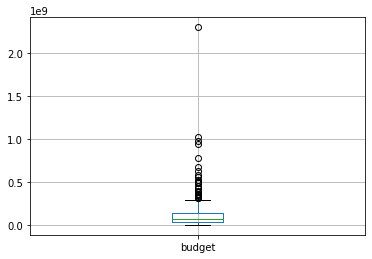

In [55]:
data.boxplot('budget')
plt.show()

Посмотрим какой процент составляют выбросы

In [56]:
data.query('budget > 280000000').shape

(33, 17)

Видим, что таких данных более 10% - не можем считать их выбросами, а часть тренда.

#### Объём возвратных средств государственной поддержки 

Построим гистаграммы размаха для поиска выбросов.

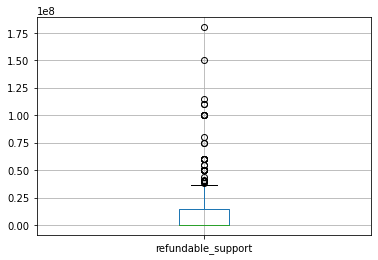

In [57]:
#объём возвратных средств государственной поддержки
data.boxplot('refundable_support')
plt.show()

Видим выбросы. Помним, что данных о поддержке 332 строки. Проверим, какой процент составляют выбросы

In [58]:
data.query('refundable_support > 35000000').shape

(41, 17)

Видим, что таких данных более 12% - не можем считать их выбросами, а часть тренда.

#### Объём невозвратных средств государственной поддержки 

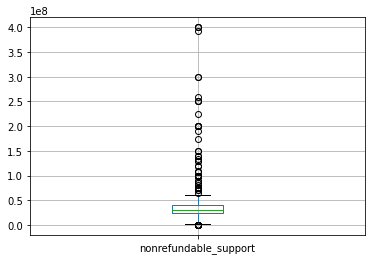

In [59]:
# объём невозвратных средств государственной поддержки
data.boxplot('nonrefundable_support')
plt.show()

Посмотрим какой процент составляют выбросы

In [60]:
data.query('nonrefundable_support > 60000000').shape

(48, 17)

Видим, что таких данных более 14% - не можем считать их выбросами, а часть тренда.

#### Сборы в рублях 

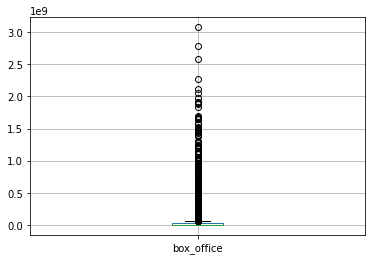

In [61]:
#сборы в рублях
data.boxplot('box_office')
plt.show()

Видим выбросы. Помним, что данных о сборах 3158 строки. Проверим, какой процент составляют выбросы

In [62]:
data.query('box_office > 100000000').shape

(435, 17)

Видим, что таких данных более 13% - не можем считать их выбросами, а часть тренда.

В связи с чем выбросы не могут быть удалены ни по одному виду количественных данных.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Верно, в некоторых столбцах бюджет был равным 0. С этой проблемой удалось справиться.

Однако распространённой практикой является также поиск выбросов в количественных данных. Это можно сделать с помощью боксплотов.

Но не спеши удалять такие значения. Стоит учитывать, что мы не можем позволить себе потерять больше 10 % процентов данных. Поэтому стоит делать проверку объёма выбросов. Если таких значений больше описанного порога, то это уже не выбросы, а часть тренда. Процент потерянных данных нужно проверять по количеству непустых значений столбца.
</div>

<div class="alert alert-block alert-info">
    
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Добавила.
    
</div>

<div class="alert alert-warning">
    <h3> Комментарий ревьюера v2 ⚠️<a class="tocSkip"> </h3>

 Супер, все возможные проблемы обозначены 👍 Но стоит писать под графиками, где начинаются выбросы и где видны основные значения.
        
 Вот так можно отобразить несколько графиков одновременно

 ```py        
numerical_columns = ['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']
fig, axs = plt.subplots(1,5,figsize=(20,5)) # Определяем количество строк (1) и столбцов (5) на графике и указываем размер графика
fig.suptitle('Распределение количественных признаков')

for i in range(5):  # Устанавливаем названия и выводим графики
  data.boxplot([numerical_columns[i]], ax = axs[i])
  axs[i].set_title(numerical_columns[i])
```
</div>

### Новые столбцы





Создадим столбец с информацией о годе проката

In [63]:
data['year_show_start'] = data['show_start_date'].dt.year

Создадим столбец с именем и фамилией главного режиссёра. Помним что в данных бывают списки режиссеров - используем первый в списке.

In [64]:
data['main_director'] = data['director'].apply(lambda x: x.split(',')[0])

In [65]:
data['main_director'] = data['main_director'].str.strip()

Создадим столбец с основным жанром фильма. Помним, что в данных списки жанров - используем первый в списке как основной.

In [66]:
data['main_genre'] = data['genres'].apply(lambda x: x.split(',')[0])

Посчитаем какую долю от общего бюджета фильма составляет государственная поддержка.

In [67]:
data['ratio_budget_support'] = data['sum_support']/data['budget']

Посчитаем окупаемость фильмов

In [68]:
data['payback'] = data['box_office'] - data['budget']

### Промежуточный итог 

Проведена предобработка:
1. заполнены пропуски в данных:
 - director режиссер 
 - genres жанр фильма
2. изменены типы данных:
 - fshow_start_date дата премьеры фильма
 - ratings рейтинг фильма на КиноПоиске
3. удалены дубликаты:
 - title название фильма
4. добавлены новые столбцы:
 - year_show_start - год премьеры фильма
 - main_director - основной режиссер
 - main_genre - основной жанр
 - ratio_budget_support - доля господдержки в бюджете фильма
 - payback - окупаемость

## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ


### Сборы по годам

Посмотрим сколько фильмов выходило в прокат каждый год. 

Данные о сборах в кинотеатрах известны не для всех фильмов. Посчитаем какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

<AxesSubplot:title={'center':'Количество фильмов по годам'}, xlabel='год премьеры фильма', ylabel='количество фильмов'>

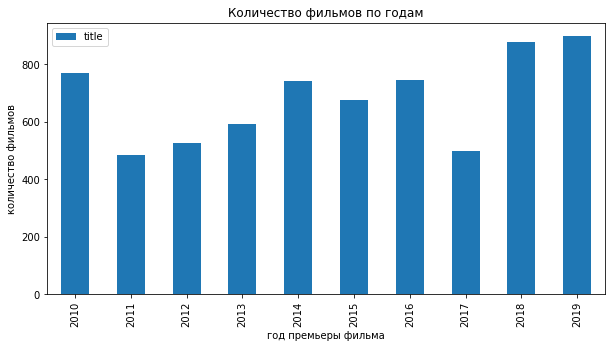

In [69]:
#посмотрим на количество фильмов по годам
data.groupby('year_show_start')[['title']].count().plot(
    xlabel='год премьеры фильма', 
    ylabel='количество фильмов',
    title='Количество фильмов по годам',
    kind='bar',
    figsize=(10,5)
)

In [70]:
#сохраним эти данные
data_year_title = data.groupby('year_show_start')[['title']].count()

<AxesSubplot:title={'center':'Количество данных о сборах по годам'}, xlabel='год премьеры фильма', ylabel='количество данных о сборах'>

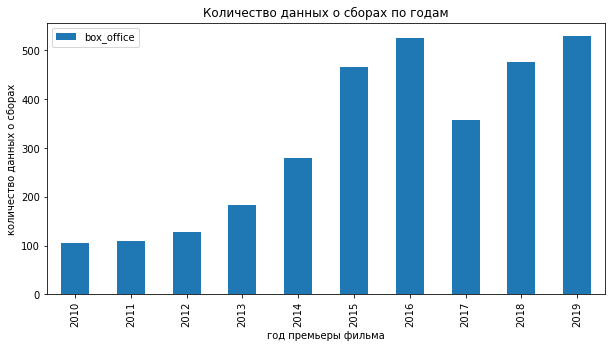

In [71]:
#посмотрим на количество данных о сборах по годам
data.groupby('year_show_start')[['box_office']].count().plot(
    xlabel='год премьеры фильма', 
    ylabel='количество данных о сборах',
    title='Количество данных о сборах по годам',
    kind='bar',
    figsize=(10,5)
)    

Помним, что у нас много пропусков в данных о сборах. Посчитаем какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем как эта доля менялась по годам.

In [72]:
ratio_year = data.groupby('year_show_start')[['title', 'box_office']].count()

In [73]:
#найдем долю
ratio_year['ratio'] = ratio_year['box_office']/ratio_year['title']

<AxesSubplot:title={'center':'Доля фильмов с данными о сборах по годам'}, xlabel='год премьеры фильма', ylabel='доля фильмов'>

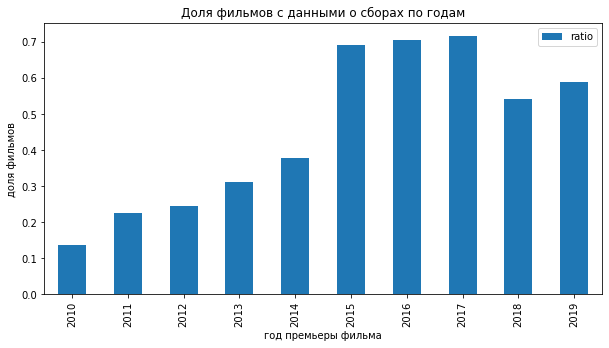

In [74]:
ratio_year.plot(
    y='ratio',
    xlabel='год премьеры фильма', 
    ylabel='доля фильмов',
    title='Доля фильмов с данными о сборах по годам',
    kind='bar',
    figsize=(10,5)
) 

In [75]:
ratio_year.head(10)

,title,box_office,ratio
year_show_start,,,
2010,768,105,0.137
2011,484,109,0.225
2012,525,128,0.244
2013,592,184,0.311
2014,740,279,0.377
2015,674,465,0.690
2016,746,526,0.705
2017,498,357,0.717
2018,876,475,0.542


О фильмах 2015-2017 года имеется более полная информация о сборах в кинотеатрах (более 70%), чем за все предыдущие годы.
Связано это с внедрением ЕАИС и подлючением к ним кинотеатров в 2015 году.
В 2018 году произошло резкое снижение (на 15%) полноты данных о сборах.

Изучим как менялась динамика проката по годам

In [76]:
data.groupby('year_show_start')[['box_office']].sum()

,box_office
year_show_start,
2010,2428654.000
2011,14102765.000
2012,6955423.000
2013,29799706.200
2014,7444951859.200
2015,39497365196.400
2016,47866299741.910
2017,48563707217.510
2018,49668403134.320


<AxesSubplot:title={'center':'Сборы по годам'}, xlabel='год премьеры фильма', ylabel='Сборы, руб'>

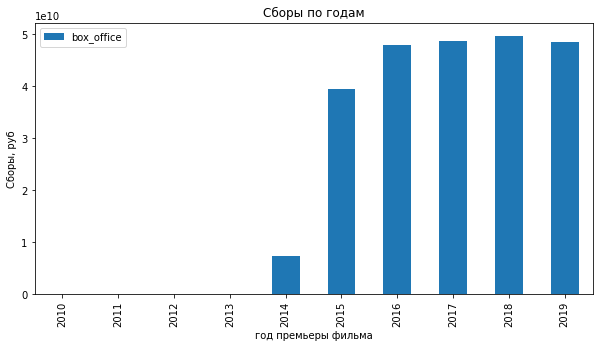

In [77]:
data.groupby('year_show_start')[['box_office']].sum().plot(
    xlabel='год премьеры фильма', 
    ylabel='Сборы, руб',
    title='Сборы по годам',
    kind='bar',
    figsize=(10,5)
)  

Максимальная сумма сборов была в 2018 году, минимальная в 2010, но выглядит неправдоподобно, возможно есть проблемы с данным до 2015 года.
Посмотрим среднее и медианное значение.

In [78]:
data.pivot_table(
    index='year_show_start', 
    values='box_office', 
    aggfunc=['count','mean', 'median']
)

,count,mean,median
,box_office,box_office,box_office
year_show_start,,,
2010,105,23130.038,1700.000
2011,109,129383.165,3000.000
2012,128,54339.242,5660.000
2013,184,161954.925,3522.500
2014,279,26684415.266,18160.000
2015,465,84940570.315,4920933.000
2016,526,91000569.852,3846679.410
2017,357,136032793.326,9968340.000


Подтверждаются проблемы с данными о сборах до 2015 года. Медианное и среднее значение неправдоподобные. Средние значения сильно отличаются от медианных по всем годам, значит есть выбросы.

Визуализируем данные за 2010

<AxesSubplot:>

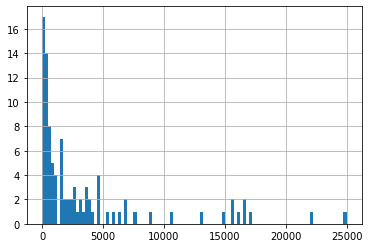

In [79]:
data[(data['year_show_start']==2010)]['box_office'].hist(bins=100, range=(0, 25000))

Очень много значений у нуля. Посмотрим поближе

In [80]:
data.query('year_show_start==2010 & box_office<1000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,sum_support,year_show_start,main_director,main_genre,ratio_budget_support,payback
3790,"Легион_.(Фильм содержит сцены ужасов, насилия ...",121000310.000,2010-01-25 12:00:00+00:00,Художественный,Болд Филмз,США,Скотт Стюарт,"Дэвид Ланкастер, Майкл Литвак",«18+» - запрещено для детей,NaN,...,NaN,NaN,unknown,560.000,NaN,2010,Скотт Стюарт,unknown,NaN,NaN
3802,Золотое сечение,111000610.000,2010-01-26 12:00:00+00:00,Художественный,"ОАО ""ТПО ""Санкт-Петербургская студия документа...",Россия,С.Дебижев,"А.Тельнов, С.Федотов",«16+» - для детей старше 16 лет,NaN,...,NaN,4.900,приключения,760.000,NaN,2010,С.Дебижев,приключения,NaN,NaN
3827,"Москва, я люблю тебя",111001610.000,2010-02-09 12:00:00+00:00,Художественный,"ООО ""БФГ-МЕДИА-ПРОДАКШН"", ООО ""Продюсерская ко...",Россия,"Г.Михалков, Г.Натансон, В.Сторожева, А.Касатки...","Ю.Глоцер, Ю.Гинзбург",«16+» - для детей старше 16 лет,NaN,...,NaN,4.500,"мелодрама,комедия",0.000,NaN,2010,Г.Михалков,мелодрама,NaN,NaN
3905,Неудержимые.,121013110.000,2010-08-02 12:00:00+00:00,Художественный,"Миллениум Филмз, Ню Имейдж Филмз, Рог Марбл",США,Сильвестр Сталлоне,"Кевин Кинг, Эви Лернер, Джон Томпсон, Кевин Ки...",«18+» - запрещено для детей,NaN,...,NaN,6.900,"боевик,приключения,триллер",350.000,NaN,2010,Сильвестр Сталлоне,боевик,NaN,NaN
3906,"Больше, чем друг",121013210.000,2010-08-02 12:00:00+00:00,Художественный,"Бон Файд Прдакшнз, Мандат Пикчерз",США,"Джош Гордон, Уилл Спек","Алберт Бергер, Алан Лоб, Брэдли Томас",«16+» - для детей старше 16 лет,NaN,...,NaN,6.700,"драма,мелодрама,комедия",130.000,NaN,2010,Джош Гордон,драма,NaN,NaN
3917,22 пули: Бессмертный,121006410.000,2010-04-01 12:00:00+00:00,Художественный,Еуроп Корпорейшн,Франция,Ришар Бери,"Люк Бессон, Дидье Хорау, Пьер-Анж Ле Погам",«16+» - для детей старше 16 лет,NaN,...,NaN,7.100,"боевик,драма,криминал",75.000,NaN,2010,Ришар Бери,боевик,NaN,NaN
3921,Принц Персии: Пески времени,121007010.000,2010-05-25 12:00:00+00:00,Художественный,"Уолт Дисней Пикчерз, Джерри Брукхаймер Филмз",США,Майкл Ньюэлл,Джерри Брукхаймер,«12+» - для детей старше 12 лет,NaN,...,NaN,7.300,"фэнтези,боевик,приключения",895.000,NaN,2010,Майкл Ньюэлл,фэнтези,NaN,NaN
3994,Стать Джоном Ленноном,121008610.000,2010-05-05 12:00:00+00:00,Художественный,"Авер Медиа, Экосси Филмз, Филм 4, Норс Вест Ви...",Канада-Великобритания,Сэм Тейлор Вуд,"Роберт Бернштейн, Кевин Лоудер, Дуглас Рэй",«16+» - для детей старше 16 лет,NaN,...,NaN,7.500,"драма,мелодрама,биография",0.000,NaN,2010,Сэм Тейлор Вуд,драма,NaN,NaN
4063,Ловец ветра,111009310.000,2010-10-21 12:00:00+00:00,Художественный,"ГУП РБ Киностудия ""Башкортостан""",Россия,А.Юмагулов,А.Юнусов,«16+» - для детей старше 16 лет,NaN,...,NaN,7.500,"драма,комедия",100.000,NaN,2010,А.Юмагулов,драма,NaN,NaN
4066,Дерево.,121020210.000,2010-11-03 12:00:00+00:00,Художественный,"Ле Фильм Дю Позьон, Тэйлор Медиа, Скрин Ауастр...",Франция-Австралия,Жюли Бертучелли,NaN,«16+» - для детей старше 16 лет,NaN,...,NaN,NaN,unknown,0.000,NaN,2010,Жюли Бертучелли,unknown,NaN,NaN


Видим, что мы не можем использовать данные о сборах до 2015 года, т.к они не соответсвуют действительности.

In [81]:
#сохраним данные с 2015 года в новую переменную
data_new = data.query('year_show_start>=2015')

In [82]:
#проверим объем данных после удаления
data_new.shape

(3693, 22)

### Жанры фильмов

Посмотрим какие жанры собирают больше

<AxesSubplot:title={'center':'Сборы в разрезе жанров'}, ylabel='Жанр'>

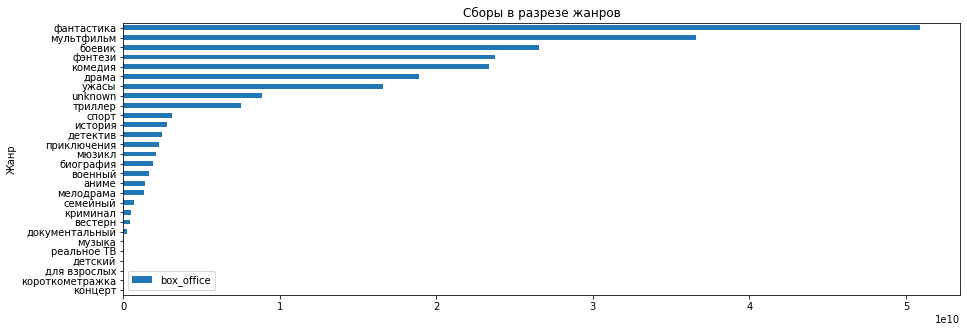

In [83]:
data_new.pivot_table(
    index='main_genre', 
    values='box_office',
    aggfunc='sum').sort_values(
    by='box_office', 
    ascending=True).plot(
    kind='barh',
    xlabel='Жанр', 
    ylabel='Сумма сборов',
    title='Сборы в разрезе жанров',
    figsize=(15,5)
)

Видим, что больше всего сборов у фантастики и мультфильмов.

### Влияние возрастного ограничения на сборы 

Посмотрим влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

<AxesSubplot:title={'center':'Влияние возрастного ограничения на сборы'}, ylabel='возрастное ограничение'>

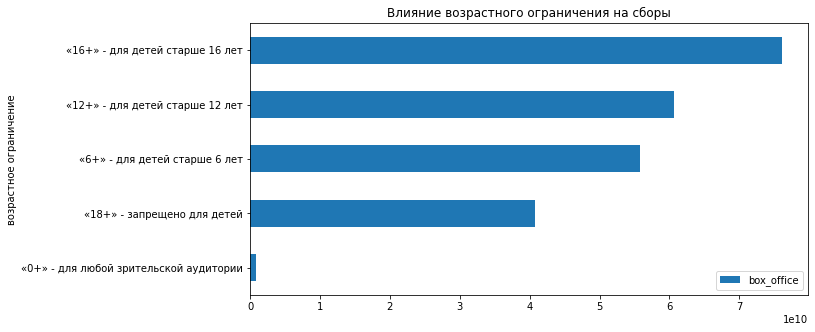

In [84]:
#построим столбчатую гистаграмму
data_new.groupby('age_restriction')[['box_office']].sum().sort_values(
    by='box_office', 
    ascending=True).plot(
    xlabel='возрастное ограничение', 
    ylabel='сборы руб',
    title='Влияние возрастного ограничения на сборы',
    kind='barh', 
    figsize=(10,5)
)

Видим, что фильмы 16+ собирают больше сборов. 
Посмотрим менялась ли картина в зависимости от года.

<AxesSubplot:title={'center':'Влияние возрастного ограничения на сборы по годам'}, ylabel='возрастное ограничение'>

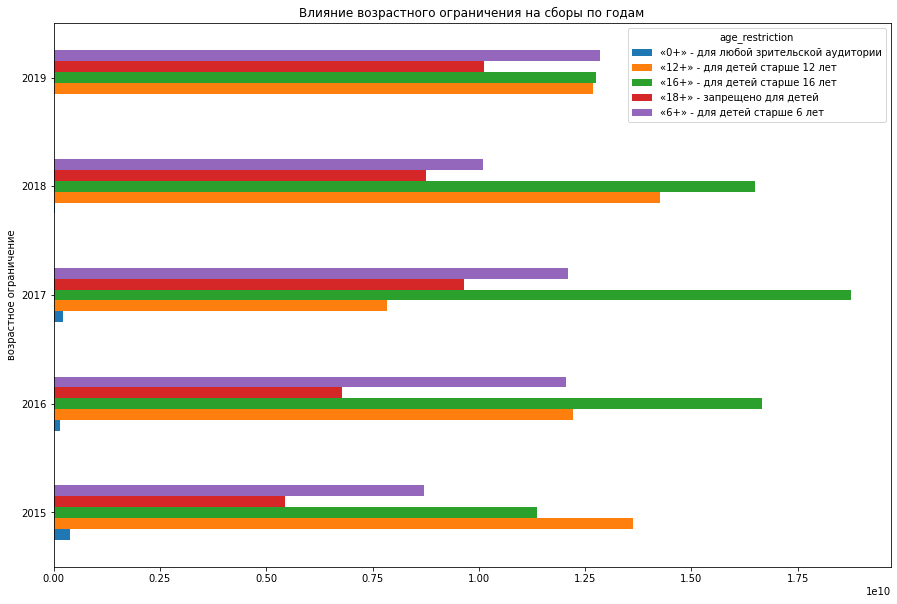

In [85]:
data_new.pivot_table(
    index='year_show_start', 
    columns='age_restriction', 
    values='box_office',
    aggfunc='sum').plot(
    xlabel='возрастное ограничение', 
    ylabel='сборы',
    title='Влияние возрастного ограничения на сборы по годам',
    kind='barh',
    figsize=(15,10)
)

In [86]:
data_new.pivot_table(
    index='age_restriction', 
    columns='year_show_start', 
    values='box_office',
    aggfunc=('sum')
)

year_show_start,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,379054578.370,150228848.670,229598930.000,32449002.110,17746066.820
«12+» - для детей старше 12 лет,13616082008.910,12204446524.390,7851427660.670,14267291660.690,12680198773.670
«16+» - для детей старше 16 лет,11368120870.270,16664548541.740,18745042900.060,16503602346.960,12753418984.600
«18+» - запрещено для детей,5432308367.440,6793929818.870,9651495581.020,8760085501.150,10121796303.640
«6+» - для детей старше 6 лет,8701799371.410,12053146008.240,12086142145.760,10104974623.410,12852548650.860


Самые высокие кассовые сборы наблюдаются в категориях «12+» и «16+». Это может указывать на то, что фильмы, предназначенные для подростков и взрослой аудитории, пользуются большей популярностью и приносят больше дохода.
В целом, категории «12+» и «16+» показывают стабильно высокие сборы на протяжении всех представленных лет. Однако, есть некоторое снижение в категории «12+» в 2017 году, что может быть связано с конкретными рыночными условиями или популярностью определённых фильмов в этот период.

Для категории «6+» характерен рост сборов с 2015 по 2019 год, что может свидетельствовать о растущем интересе к фильмам, подходящим для детей старше 6 лет.

Наблюдается значительное снижение сборов в категории «0+» после 2015 года, что может указывать на сокращение числа фильмов, подходящих для всех возрастных групп, или на изменение интересов зрителей.

Категория «18+» показывает рост сборов с 2015 по 2017 год, затем небольшое снижение в 2018 году и снова рост в 2019 году. Это может отражать колебания в производстве и популярности фильмов для взрослых.


<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Да, верно группа 16+ собирает больше других во все годы. Но описать только одну группу, к сожалению, недостаточно. Чтобы показать результаты в динамике, опиши и другие группы, пожалуйста, и добавь название и подписи к графику.

</div>

<div class="alert alert-block alert-info">
    
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Готово
    
</div>

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Очень хороший вывод. Теперь данные описаны значительно подробнее! Я бы добавил, что в 2018 году происходят какие-то интересные процессы, так как падают ранее популярные фильмы (6+, 18+) и растут ранее менее популярные (12+). 
</div>

### Промежуточный итог 

Были обнаружены проблемы в данных по сборам за 2010-2015 год.

О фильмах 2015-2017 года имеется более полная информация о сборах в кинотеатрах (более 70%), чем за все предыдущие годы.
Связано это с внедрением ЕАИС и подлючением к ним кинотеатров в 2015 году.

В 2017 год сумма сборов была максимальной, в 2015 - минимальная.

Самые высокие кассовые сборы наблюдаются в категориях «12+» и «16+». Это может указывать на то, что фильмы, предназначенные для подростков и взрослой аудитории, пользуются большей популярностью и приносят больше дохода.

Для категории «6+» характерен рост сборов с 2015 по 2019 год, что может свидетельствовать о растущем интересе к фильмам, подходящим для детей старше 6 лет.

Наблюдается значительное снижение сборов в категории «0+» после 2015 года, что может указывать на сокращение числа фильмов, подходящих для всех возрастных групп, или на изменение интересов зрителей.

Категория «18+» показывает рост сборов с 2015 по 2017 год, затем небольшое снижение в 2018 году и снова рост в 2019 году. Это может отражать колебания в производстве и популярности фильмов для взрослых.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Супер, все шаги учтены. Но некоторые выводы немного изменятся после доработок.

</div>


<div class="alert alert-block alert-info">
    
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Добавила.
    
</div>

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Отлично, изменения учтены!
</div>

## Фильмы, которые получили государственную поддержку

In [87]:
#создадим переменную для фильмов с гос.поддержкой
data_support = data.query('sum_support>0')

In [88]:
data_support.shape

(332, 22)

Источник гос.поддержки

In [89]:
data_support.pivot_table(
    index='financing_source', 
    values='sum_support',
    aggfunc=('sum', 'count')
)

,count,sum
financing_source,,
Министерство культуры,164,4836661000.000
"Министерство культуры, Фонд кино",22,1185431354.000
Фонд кино,146,14178595958.000


array([<AxesSubplot:ylabel='гос.поддержка руб'>], dtype=object)

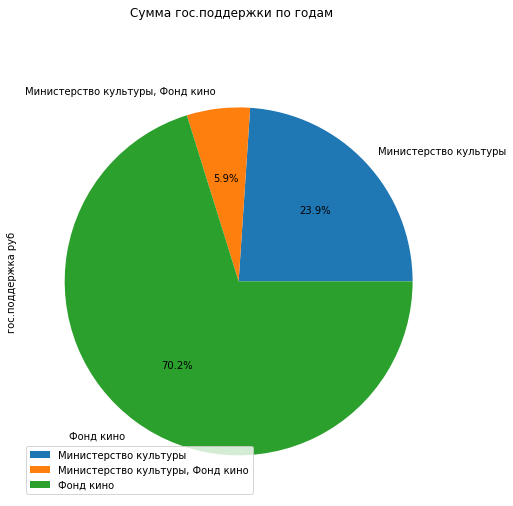

In [90]:
data_support.groupby('financing_source')[['sum_support']].sum().plot(
    xlabel='год', 
    ylabel='гос.поддержка руб',
    title='Сумма гос.поддержки по годам',
    kind='pie',
    autopct='%1.1f%%',
    subplots=True,
    figsize=(8,8)
)

Главным источником гос.поддержки кинопроизводства (71,1%) является Фонд кино.

 <div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

 Верно! Отличный выбор графика. При небольшом количестве категорий он позволяет наглядно сравнить доли.
</div>


Посмотрим сколько средств было выделено на поддержку кино по годам

<AxesSubplot:title={'center':'Сумма гос.поддержки по годам'}, xlabel='год', ylabel='гос.поддержка руб'>

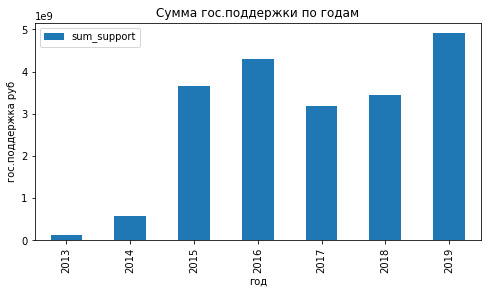

In [91]:
data_support.groupby('year_show_start')[['sum_support']].sum().plot(
    xlabel='год', 
    ylabel='гос.поддержка руб',
    title='Сумма гос.поддержки по годам',
    kind='bar',
    figsize=(8,4)
)

In [92]:
data_support.pivot_table(
    index='year_show_start', 
    values='sum_support',
    aggfunc=('sum', 'count')
)

,count,sum
year_show_start,,
2013,2,134347945.000
2014,16,572002299.000
2015,86,3656241459.000
2016,61,4303155482.000
2017,41,3183971662.000
2018,56,3446969465.000
2019,70,4904000000.000


В 2019 году были выделена максимальная сумма поддержки (5 млрд руб).

 <div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

 Да, верно 
</div>

Жанры фильмов

<AxesSubplot:title={'center':'Сумма гос.поддержки по жанрам'}, ylabel='жанр'>

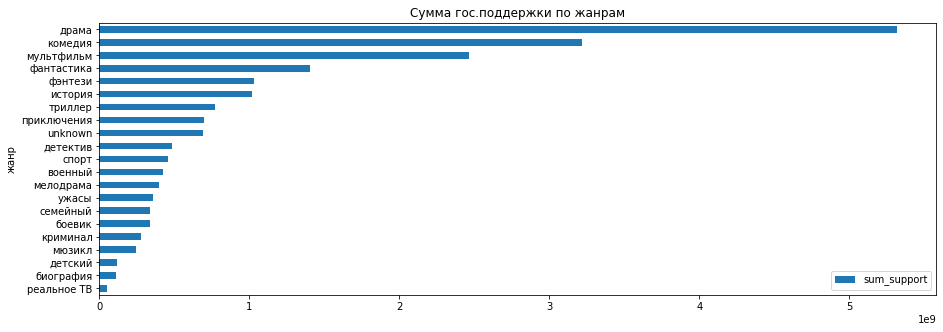

In [93]:
data_support.pivot_table(
    index='main_genre', 
    values='sum_support',
    aggfunc='sum').sort_values(
    by='sum_support', 
    ascending=True).plot(
    xlabel='жанр', 
    ylabel='гос.поддержка',
    title='Сумма гос.поддержки по жанрам',
    kind='barh',
    figsize=(15,5)
)

На драмы и комедии было выделено больше всего поддержки.

Посмотрим на количество поддерживаемых фильмов в определенном жанре.

<AxesSubplot:title={'center':'Количество поддерживаемых фильмов по жанрам'}, ylabel='жанр'>

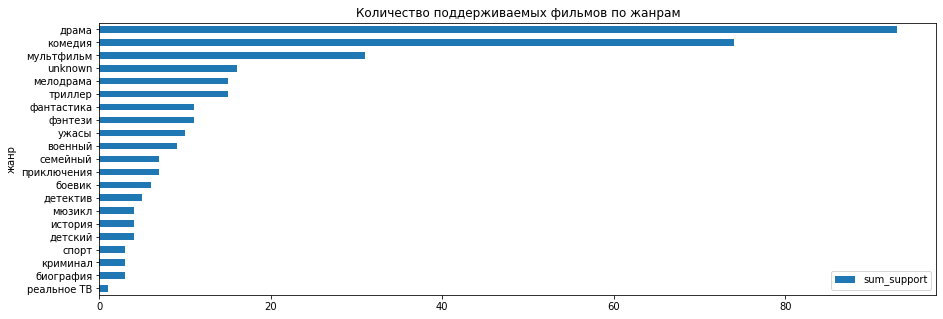

In [94]:
data_support.pivot_table(
    index='main_genre',
    values='sum_support',
    aggfunc='count').sort_values(
    by='sum_support',
    ascending=True).plot(
    xlabel='жанр', 
    ylabel='количество',
    title='Количество поддерживаемых фильмов по жанрам',
    kind='barh',
    figsize=(15,5)
)

Фильмы жанров драма и комедия получают гос.поддержки значительно чаще фильмов др.жанров.

<div class="alert alert-warning">
    <h3> Комментарий ревьюера ⚠️<a class="tocSkip"> </h3>

Верный вывод, но также стоит отсортировать данные для наглядности.

Стоило бы сравнить результаты жанров по боксплотам, потому что суммарные продажи могут быть продиктованы большим количеством фильмов в определённом жанре.

</div>

<div class="alert alert-block alert-info">
    
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Исправила.
    
</div>

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Здорово, что стараешься улучшать проект на каждом шаге. Это ценно! 🙏
</div>

Режиссер

In [95]:
data_support.pivot_table(
    index='main_director', 
    values=('sum_support', 'budget', 'box_office', 'payback'),
    aggfunc='sum'
).sort_values(by='sum_support', ascending=False)

,box_office,budget,payback,sum_support
main_director,,,,
Ф.Бондарчук,1038321489.000,1194000000.000,788321489.000,750000000.000
Н.Хомерики,618142950.230,943704666.000,-325561715.770,660000000.000
А.Кравчук,717703185.530,980000000.000,-262296814.470,500000000.000
Р.Давлетьяров,299262932.440,770430237.000,-471167304.560,459847945.000
А.Мизгирев,364285139.600,684200536.000,-319915396.400,450000000.000
...,...,...,...,...
Ю.Кара,334750.000,40000000.000,-39665250.000,10000000.000
Е.Жигаева,270497.000,18166418.000,-17895921.000,8000000.000
Е.Константинова (псевдоним Алена Званцева),2323980.000,28115580.000,-25791600.000,5000000.000


Больше всего поддержки было выделено Ф.Бондарчуку.

In [96]:
non_payback = data.query('payback<0')

In [97]:
non_payback.shape

(239, 22)

Видим, что из 332 фильмов с гос.поддержкой не окупились 239 фильмов, т.е 72% фильмов.

Посмотрим как зрители стимингов оценили эти фильмы с гос.поддержкой

<AxesSubplot:title={'center':'Фильмы с поддержкой по рейтингу'}, xlabel='Рейтинг', ylabel='Сумма поддержки'>

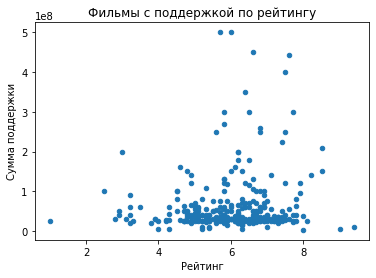

In [98]:
data_support.plot(
    x='ratings', 
    y='sum_support',
    xlabel='Рейтинг', 
    ylabel='Сумма поддержки',
    title='Фильмы с поддержкой по рейтингу',
    kind='scatter'
)

Видим, что фильмы с самыми большими суммами поддержки имеют рейтинг от 6 до 8. Рейтинг не зависит от суммы поддержки.

 <div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

 Вывод верный. Зависимости действительно не наблюдается.
</div>

## ОБЩИЙ ВЫВОД

**Краткий обзор проведённой работы:**

В нашем распоряжении имелось 7486 строк данных о фильмах. 
Была проведена предобработка:
1. заполнены пропуски в данных
2. удалены строки с пропусками, которые нельзя заполнить
3. изменены типы данных
4. удалены дубликаты
5. добавлены новые столбцы:
 - year_show_start - год премьеры фильма
 - main_director - основной режиссер
 - main_genre - основной жанр
 - ratio_budget_support - доля господдержки в бюджете фильма
 - payback - окупаемость  

Проверены данные по сборам по годам и влияние возрастного ограничения на сборы и изучены фильмы, получавшие гос.поддержку.

 
    
**Главные выводы** 

Были обнаружены проблемы в данных по сборам за 2010-2015 год.
О фильмах 2015-2017 года имеется более полная информация о сборах в кинотеатрах (более 70%), чем за все предыдущие годы.
Связано это с внедрением ЕАИС и подлючением к ним кинотеатров в 2015 году.
В 2017 год сумма сборов была максимальной, в 2015 - минимальная.

Самые высокие кассовые сборы наблюдаются в категориях «12+» и «16+». Это может указывать на то, что фильмы, предназначенные для подростков и взрослой аудитории, пользуются большей популярностью и приносят больше дохода.

Фильмы жанра фантастика и мультфильмы приносят больше сборов.

Главным источником гос.поддержки кинопроизводства (71,1%) является Фонд кино.
В 2019 году были выделена максимальная сумма поддержки (5 млрд руб).
Больше всего поддержки было получено реж. Ф.Бондарчуком (750 млн руб)

Из 332 фильмов с гос.поддержкой не окупились 239 фильмов (т.е 72% фильмов).
Фильмы с самыми большими суммами поддержки имеют рейтинг от 6 до 8. Рейтинг не зависит от суммы поддержки.



**Рекомендации** 

1. дальнейшее развитие ЕАИС
2. поддержка фильмов жанра фантастика и мультфильмы
3. поддержка кинопроизводства другими способами (возможно обучение, стажировки, развитие компьютерной графики).


<div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

Хороший структурированный вывод, учитывающий все показатели и этапы проекта. Отличная работа!
    
</div>